In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [12]:
df = pd.read_csv('train.csv')

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df.shape

(891, 12)

In [17]:
corr = df.corr()

C:\Users\ABC\AppData\Local\Temp\ipykernel_12604\658818363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


In [18]:
import matplotlib.pyplot as plt
plot_df = df.Transported.value_counts()
plot_df.plot(kind="bar")

AttributeError: 'DataFrame' object has no attribute 'Transported'

In [ ]:
df.Name.isnull().sum()

In [19]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df=df[~(df.Name.isnull())]
df.Name.isna().sum()

NameError: name 'df' is not defined

In [13]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [14]:
X = df.drop(columns=['Transported'])

In [15]:
X

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre


In [16]:
y= df.Transported

In [17]:
y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8493, dtype: bool

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8493 entries, 0 to 8692
Data columns (total 14 columns):
PassengerId     8493 non-null object
HomePlanet      8299 non-null object
CryoSleep       8286 non-null object
Cabin           8296 non-null object
Destination     8315 non-null object
Age             8317 non-null float64
VIP             8291 non-null object
RoomService     8313 non-null float64
FoodCourt       8315 non-null float64
ShoppingMall    8289 non-null float64
Spa             8316 non-null float64
VRDeck          8309 non-null float64
Name            8493 non-null object
Transported     8493 non-null bool
dtypes: bool(1), float64(6), object(7)
memory usage: 937.2+ KB


In [19]:
df.duplicated().sum()

0

In [20]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [22]:
X_train.shape

(6369, 13)

In [23]:
y_train.shape

(6369,)

In [24]:
df.Age.mean()

28.846338824095227

In [25]:
df.RoomService.mean()

224.11018886082041

In [26]:
df.FoodCourt.mean()

457.97787131689716

In [27]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8317.000000,8313.000000,8315.000000,8289.000000,8316.000000,8309.000000
mean,28.846339,224.110189,457.977871,171.869466,311.597403,302.019377
std,14.463475,666.018579,1614.080041,553.288841,1142.924216,1117.970724
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,46.000000,78.000000,26.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,12253.000000,22408.000000,20336.000000


In [28]:
X_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
3166,3413_01,Earth,True,G/559/P,PSO J318.5-22,27.0,False,0.0,0.0,0.0,0.0,0.0,Weney Franton
115,0120_01,Mars,True,F/25/P,TRAPPIST-1e,24.0,False,0.0,0.0,0.0,0.0,NaN,Bees Sacre
3287,3531_02,Mars,True,F/731/P,TRAPPIST-1e,45.0,NaN,NaN,0.0,0.0,0.0,0.0,Cinda Erflé
4978,5310_01,Mars,False,F/1021/S,TRAPPIST-1e,32.0,False,4702.0,0.0,449.0,190.0,0.0,Dontch Terry
1105,1169_01,Mars,NaN,F/221/S,TRAPPIST-1e,40.0,False,2357.0,0.0,9.0,0.0,0.0,Tifet Sin
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5877,6224_02,Earth,False,G/1006/S,55 Cancri e,8.0,False,0.0,0.0,0.0,0.0,0.0,Shaele Rodger
5319,5684_04,Europa,True,B/218/S,TRAPPIST-1e,62.0,False,0.0,0.0,0.0,0.0,0.0,Okulus Folhal
5521,5886_01,Mars,False,F/1216/P,TRAPPIST-1e,24.0,False,10.0,49.0,NaN,1497.0,10.0,Swack Fate
880,0942_01,Mars,False,F/196/P,TRAPPIST-1e,18.0,False,594.0,0.0,555.0,0.0,0.0,Triple Vloaf


In [29]:
df.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [30]:
df.CryoSleep.unique()

array([False, True, nan], dtype=object)

In [31]:
df.Cabin.unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [32]:
df.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [33]:
df.VIP.unique()

array([False, True, nan], dtype=object)

In [34]:
X_train.Name.isnull().sum()

0

In [35]:
t = df[['HomePlanet','Transported','PassengerId']].groupby(['HomePlanet','Transported']).count().unstack()
t['Transported_rate'] = round(t.iloc[:,0]/(t.iloc[:,0]+t.iloc[:,1]), 2)
t

PassengerId       Transported_rate
Transported       False  True                 
HomePlanet                                    
Earth              2590  1906             0.58
Europa              710  1375             0.34
Mars                821   897             0.48

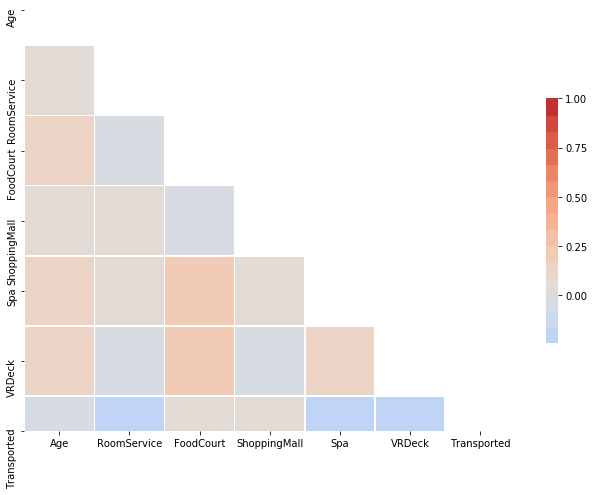

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
cmap = sns.color_palette("coolwarm", 24)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11,9))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# Making Column Transformer

In [37]:
# imputation transformer

trf1 = ColumnTransformer([
    ('impute_age',SimpleImputer(),[5]),
    ('impute_room_Service',SimpleImputer(),[7]),
    ('impute_food_court',SimpleImputer(),[8]),
    ('impute_shopingmall',SimpleImputer(),[9]),
    ('impute_spa',SimpleImputer(),[10]),
    ('impute_VRDeck',SimpleImputer(),[11]),
    ('impute_HomePlanet',SimpleImputer(strategy='most_frequent'),[]),
    ('impute_Cryosleep',SimpleImputer(strategy='most_frequent'),[]),
    ('impute_Cabin',SimpleImputer(strategy='most_frequent'),[]),
    ('impute_destination',SimpleImputer(strategy='most_frequent'),[]),
    ('impute_VIP',SimpleImputer(strategy='most_frequent'),[]),
],remainder='passthrough')


In [38]:
# one hot encoding
cat = [1,2,3,4,6]
trf2  = ColumnTransformer([
    ("onehot_categorical", OneHotEncoder(sparse = False,handle_unknown='ignore'), cat)],
    remainder= "passthrough")


In [39]:
# Scaling
trf3 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,10))
])

In [40]:
trf4 = SelectKBest(score_func=chi2,k=8)

In [41]:
trf5 = RandomForestClassifier()

In [42]:
X_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
3166,3413_01,Earth,True,G/559/P,PSO J318.5-22,27.0,False,0.0,0.0,0.0,0.0,0.0,Weney Franton
115,0120_01,Mars,True,F/25/P,TRAPPIST-1e,24.0,False,0.0,0.0,0.0,0.0,NaN,Bees Sacre
3287,3531_02,Mars,True,F/731/P,TRAPPIST-1e,45.0,NaN,NaN,0.0,0.0,0.0,0.0,Cinda Erflé
4978,5310_01,Mars,False,F/1021/S,TRAPPIST-1e,32.0,False,4702.0,0.0,449.0,190.0,0.0,Dontch Terry
1105,1169_01,Mars,NaN,F/221/S,TRAPPIST-1e,40.0,False,2357.0,0.0,9.0,0.0,0.0,Tifet Sin
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5877,6224_02,Earth,False,G/1006/S,55 Cancri e,8.0,False,0.0,0.0,0.0,0.0,0.0,Shaele Rodger
5319,5684_04,Europa,True,B/218/S,TRAPPIST-1e,62.0,False,0.0,0.0,0.0,0.0,0.0,Okulus Folhal
5521,5886_01,Mars,False,F/1216/P,TRAPPIST-1e,24.0,False,10.0,49.0,NaN,1497.0,10.0,Swack Fate
880,0942_01,Mars,False,F/196/P,TRAPPIST-1e,18.0,False,594.0,0.0,555.0,0.0,0.0,Triple Vloaf


# Create Pipe Line

In [43]:
pipe = Pipeline([
                ('trf1',trf1),
                ('trf2',trf2),
                ('trf3',trf3),
                ('trf4',trf4),
                ('trf5',trf5)
            ])

In [44]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [5]),
                                                 ('impute_room_Service',
                                                  SimpleImputer(), [7]),
                                                 ('impute_food_court',
                                                  SimpleImputer(), [8]),
                                                 ('impute_shopingmall',
                                                  SimpleImputer(), [9]),
                                                 ('impute_spa', SimpleImputer(),
                                                  [10]),
                                                 ('impute_VRDeck',
                                                  SimpleImputer(), [11]),
                                                 ('impute_HomePl

In [45]:
y_train

3166    False
115      True
3287     True
4978    False
1105    False
        ...  
5877     True
5319     True
5521    False
880     False
7444    False
Name: Transported, Length: 6369, dtype: bool

In [46]:
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_age', SimpleImputer(), [5]),
                                 ('impute_room_Service', SimpleImputer(), [7]),
                                 ('impute_food_court', SimpleImputer(), [8]),
                                 ('impute_shopingmall', SimpleImputer(), [9]),
                                 ('impute_spa', SimpleImputer(), [10]),
                                 ('impute_VRDeck', SimpleImputer(), [11]),
                                 ('impute_HomePlanet',
                                  SimpleImputer(strategy='most_frequent'), []),
                                 ('impute_Cryosleep',
                                  SimpleImputer(strategy='most_frequent'), []),
                                 ('impute_Cabin',
                                  SimpleImputer(strategy='most_frequent'), []),
                                 ('impute_destination',
                                  Simp

In [47]:
from sklearn import set_config
set_config(display="diagram")
pipe

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [5]),
                                                 ('impute_room_Service',
                                                  SimpleImputer(), [7]),
                                                 ('impute_food_court',
                                                  SimpleImputer(), [8]),
                                                 ('impute_shopingmall',
                                                  SimpleImputer(), [9]),
                                                 ('impute_spa', SimpleImputer(),
                                                  [10]),
                                                 ('impute_VRDeck',
                                                  SimpleImputer(), [11]),
                                                 ('impute_HomePlanet',
                                                  SimpleImpu...
                                                  [])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot_categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2, 3, 4, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf4',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x0000018A0C3F3168>)),
                ('trf5', RandomForestClassifier())])

In [48]:
y_pred = pipe.predict(X_train)
y_pred

array([ True,  True, False, ..., False, False, False])

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred)

0.6694928560213534

In [50]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

0.6698060552397889

In [1]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
    pipe=pipe
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_train)
    scores.append(accuracy_score(y_train,y_pred))

NameError: name 'train_test_split' is not defined

In [54]:
scores

[]

In [ ]:
scores[np.argmax(scores)]